<a href="https://colab.research.google.com/github/kavya6301/Human-fall-detection--BTP/blob/main/Fall_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Jun  5 07:04:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 37kB/s 


#Fall detection architecture

In [ ]:
import cv2
import numpy as np
import os
import tensorflow as tf

# Define the CNN-LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(5, 120, 160, 3)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2), padding='same')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2), padding='same')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2), padding='same')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load the dataset
train_data = []
train_labels = []
test_data = []
test_labels = []

# Train the model
model.fit(np.array(train_data), np.array(train_labels), epochs=10, batch_size=32)

# Evaluate the model
model.evaluate(np.array(test_data), np.array(test_labels))


#Frame extraction

In [ ]:
import cv2
import numpy as np
import os
#video read
for a in range(10,26):
  video = cv2.VideoCapture('/content/drive/MyDrive/Fall_detection_new/UCF-101/LongJump/v_LongJump_g'+str(a)+'_c01.avi')
  i=0
  #video write
  #fourcc = cv2.VideoWriter_fourcc(*"XVID")
  #output = cv2.VideoWriter('new_output.avi',fourcc, 32.0, (1600,1200))
  #output=cv2.VideoWriter('output.avi',cv2.CV.CV_FOURCE('M','J','P','G'),32,(640,360),1)
  os.makedirs('/content/drive/MyDrive/Fall_detection_new/UCF-101/LongJump/v_LongJump_g'+str(a)+'_c01/v_LongJump_g'+str(a)+'/')
  while True:
      ret, frame = video.read()
      if ret==True:
          gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
          # write the gray frame
          #cv2.imwrite('D:/phd/human movement/sumit_electrical/result/gray.jpg',gray)
          cv2.imwrite('/content/drive/MyDrive/Fall_detection_new/UCF-101/LongJump/v_LongJump_g'+str(a)+'_c01/v_LongJump_g'+str(a)+'_c01frame%s.jpg'%i,frame)
          i=i+1
          #output.write(gray)
          #show the video
          if cv2.waitKey(1) & 0xFF == ord('q'):
              break
      else:
          break

  # Release everything if job is finished
  video.release()
  #output.release()
  cv2.destroyAllWindows()

# YOLOv3 Object detection

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15420, done.
remote: Total 15420 (delta 0), reused 0 (delta 0), pack-reused 15420
Receiving objects: 100% (15420/15420), 14.02 MiB | 7.04 MiB/s, done.
Resolving deltas: 100% (10362/10362), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-06-05 06:58:27--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   104MB/s    in 2.3s    

2022-06-05 06:58:29 (104 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

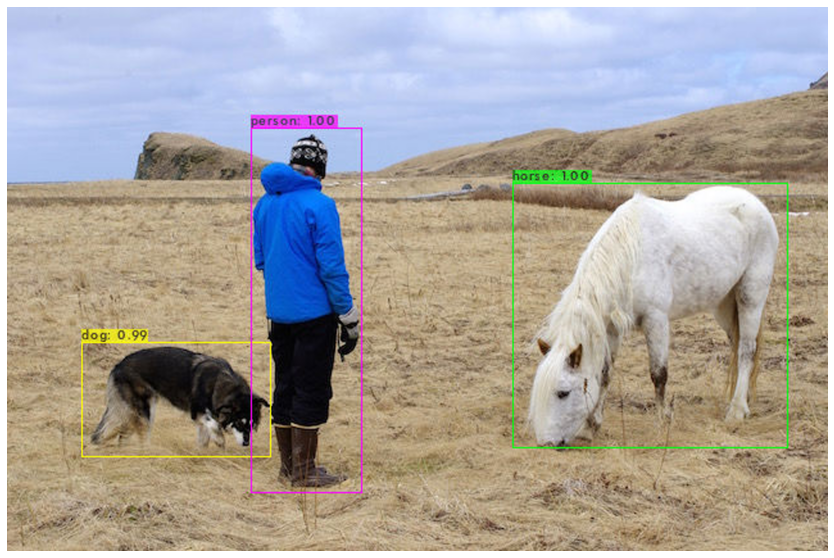

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

#Applying Yolov3 on our frames

In [ ]:
#creating a txt file to store all the frames in it 
#store all the paths in the txt file
# my_file=open("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/fall-01-cam0-rgb.txt","w+")
# for i in range(0,10):
#   my_file.write("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/fall-01-cam0-rgb/fall-01-cam0-rgb-00"+str(i)+".png\n")
# for i in range(10,100):
#   my_file.write("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/fall-01-cam0-rgb/fall-01-cam0-rgb-0"+str(i)+".png\n")
# for i in range(100,161):
#   my_file.write("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/fall-01-cam0-rgb/fall-01-cam0-rgb-"+str(i)+".png\n")

In [ ]:
#creating a txt file to store all the frames in all videos
#store all the paths in the txt file
import os
videos=os.listdir('/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/')
# video=videos[0]
# os.listdir("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/"+video)
for video in videos:
  my_file=open("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/"+video+".txt","w+")
  frames=os.listdir("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/"+video)
  for frame in frames:
    my_file.write("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/"+video+"/"+frame+"\n")
# for a in range(1,30):
#   num=str(a)
#   if a<9:
#     num='0'+num
#   my_file=open("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/fall-"+num+"-cam0-rgb.txt","w+")
#   for i in range(0,10):
#   my_file.write("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/fall-01-cam0-rgb/fall-01-cam0-rgb-00"+str(i)+".png\n")
# for i in range(10,100):
#   my_file.write("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/fall-01-cam0-rgb/fall-01-cam0-rgb-0"+str(i)+".png\n")
# for i in range(100,161):
#   my_file.write("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/fall-01-cam0-rgb/fall-01-cam0-rgb-"+str(i)+".png\n")

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/fall-01-cam0-rgb/fall-01-cam0-rgb-001.png

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

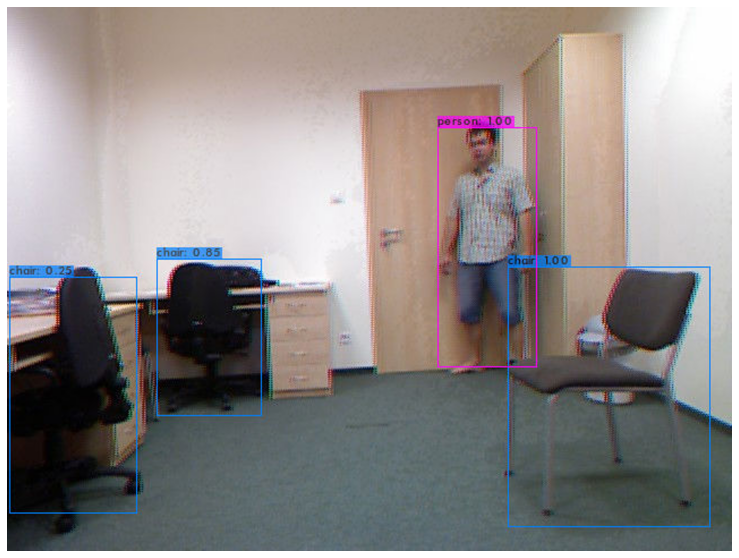

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
#applying yolov3 predictions on all the frames, saving in txt file
# import os
# s=len(os.listdir("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/"))
# for i in range(0,s):
#   num=str(i)
#   if i<10:
#     num='0'+'0'+num
#   elif i<100:
#     num='0'+num
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights <"/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-01-cam0-rgb.txt"> "/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-01-cam0-rgb-result.txt"

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 B

In [ ]:
#applying yolov3 predictions on all the frames, saving in json file

!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-01-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-01-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-02-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-02-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-03-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-03-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-04-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-04-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-05-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-05-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-06-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-06-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-07-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-07-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-08-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-08-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-09-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-09-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-10-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-10-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-11-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-11-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-12-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-12-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-13-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-13-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-14-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-14-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-15-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-15-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-16-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-16-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-17-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-17-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-18-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-18-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-19-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-19-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-20-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-20-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-21-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-21-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-22-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-22-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-23-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-23-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-24-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-24-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-25-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-25-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-26-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-26-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-27-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-27-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-28-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-28-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-29-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-29-cam0-rgb.txt
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-30-cam0-rgb-result.json < /content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-30-cam0-rgb.txt

Streaming output truncated to the last 5000 lines.
  73 conv   1024       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x1024 1.595 BF
  74 Shortcut Layer: 71,  wt = 0, wn = 0, outputs:  13 x  13 x1024 0.000 BF
  75 conv    512       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 512 0.177 BF
  76 conv   1024       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x1024 1.595 BF
  77 conv    512       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 512 0.177 BF
  78 conv   1024       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x1024 1.595 BF
  79 conv    512       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 512 0.177 BF
  80 conv   1024       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x1024 1.595 BF
  81 conv    255       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 255 0.088 BF
  82 yolo
[yolo] params: iou loss: mse (2), iou_norm: 0.75, obj_norm: 1.00, cls_norm: 1.00, delta_norm: 1.00, scale_x_y: 1.00
  83 route  79 		                           ->   13 x  13 x 512 
  84 conv    256       1 x 1/ 1     13 x  

#Slow feature analysis : 
  - Features extraction:
          1. Aspect ratio
          2. Area 
          3. Horizontal and vertical gradients
          4. Fall Angle
          * Affinity

In [ ]:
import json
cam0_vals=[]
for i in range(1,31):
  num=str(i)
  if i<10:
    num='0'+num

  with open("/content/drive/MyDrive/Fall_detection_new/UR-fallcam0/frameslinks/fall-"+num+"-cam0-rgb-result.json", mode="r") as readit:
    cam0_val= json.load(readit)
  cam0_vals.append(cam0_val)
# print(cam0_val)
print(len(cam0_val))
print(len(cam0_vals))

70
30


**FEATURES: ASPECT RATIO, AREA**

In [ ]:
# import numpy as np
aspect_ratio=[]
# [[0]*len(cam0_val)]*len(cam0_vals)
#  np.zeros(len(cam0_val), dtype=float)
area=[]
# [[0]*len(cam0_val)]*len(cam0_vals)
# a=0
# aspect_ratio
# for k in range(len(cam0_vals)):
#   cam0_val=cam0_vals[k]
#   print(cam0_val[0]["objects"]["class_id"])
# cam0_val=cam0_vals[0]

for cam0_val in cam0_vals:
  apt=[]
  ar=[]
  for i in cam0_val:
    for j in i["objects"]:
      if j["class_id"]==0:
        apt.append( float(j["relative_coordinates"]["width"])/float(j["relative_coordinates"]["height"]))
        ar.append( j["relative_coordinates"]["width"] * j["relative_coordinates"]["height"])
        # a=a+1
  aspect_ratio.append(apt)
  area.append(ar)

In [ ]:
aspect_ratio
# print(len(aspect_ratio[0]))
# len(aspect_ratio)

[[0.30448769800367004,
  0.3011099241753011,
  0.3112451997190524,
  0.29514999587545715,
  0.285837614042383,
  0.28628345567476005,
  0.31389649074441406,
  0.286680567905161,
  0.31664005590471433,
  0.3149362948948165,
  0.3216369163885876,
  0.31611085420542656,
  0.30949383493168436,
  0.3032415720365394,
  0.3140340311774099,
  0.33353478493602473,
  0.31619149811178165,
  0.34290495140496446,
  0.34816875189402136,
  0.34451747769492697,
  0.3449331812606254,
  0.3557637171246887,
  0.35668851547977276,
  0.34224396462842305,
  0.34788288585392013,
  0.35204073990863477,
  0.3268425727617142,
  0.3049143820157092,
  0.31110427534467217,
  0.2980694562707799,
  0.28025732545774246,
  0.28518205473790886,
  0.27166875586941863,
  0.258424823772522,
  0.26863348165328427,
  0.2682335529058618,
  0.24499470650511707,
  0.26535914965155427,
  0.2674731155405116,
  0.24338743147396785,
  0.254469573289798,
  0.2505432745619333,
  0.26320902685113656,
  0.2649496402877698,
  0.2574762

In [ ]:
area

[[0.0570074345,
  0.058040516761000006,
  0.059851294776,
  0.056212920484000006,
  0.05596600872000001,
  0.056119447999999995,
  0.062484681987,
  0.057148931034000004,
  0.064747518432,
  0.068752107188,
  0.06752766712500001,
  0.068331961885,
  0.073139115078,
  0.071188291668,
  0.07132098889100001,
  0.07159344051199999,
  0.07255426064899999,
  0.072989630256,
  0.07430809706,
  0.07417962926,
  0.07448376603000001,
  0.077711811928,
  0.076876715843,
  0.074797637518,
  0.07684831051800001,
  0.07689298344,
  0.069976870197,
  0.065988540688,
  0.06817599813599999,
  0.068769949932,
  0.06320244465000001,
  0.066125763044,
  0.06349232973,
  0.060156181059,
  0.060865388262000004,
  0.06172893044,
  0.06373811772,
  0.061905883338,
  0.06440680017200001,
  0.06495214534400001,
  0.06357261456,
  0.06643305112899998,
  0.06916155688799999,
  0.07198723125,
  0.065236836477,
  0.07205830036199999,
  0.072905766318,
  0.074271522978,
  0.07856683905600001,
  0.073906969089,
  0.0

In [ ]:
ratio=[]
for i in range(len(aspect_ratio)):
  rat=[]
  for j in range(len(aspect_ratio[i])):
    rat.append(area[i][j]/aspect_ratio[i][j])
  ratio.append(rat)

In [ ]:
ratio

[[0.187224097636,
  0.192755243521,
  0.192296282256,
  0.190455433744,
  0.19579651512100002,
  0.19602756249999997,
  0.199061422569,
  0.199347069289,
  0.20448303120399997,
  0.21830480736099997,
  0.20994998920900002,
  0.216164554225,
  0.23631848787600002,
  0.234757692324,
  0.22711229296900004,
  0.21465059641599998,
  0.229463034529,
  0.21285674049599995,
  0.2134255204,
  0.2153145604,
  0.21593679610000002,
  0.21843658638400001,
  0.21552899100100004,
  0.218550640036,
  0.220902820009,
  0.21842069602500003,
  0.21409961868099997,
  0.216416622436,
  0.21914195187599997,
  0.23071786956100004,
  0.225515763225,
  0.23187210396100003,
  0.23371229984400002,
  0.232780195729,
  0.226574096004,
  0.23013127839999994,
  0.2601612036,
  0.23329093200399997,
  0.24079728552100005,
  0.26686729446400004,
  0.249824030976,
  0.2651559944889999,
  0.262762860816,
  0.2717015625,
  0.253370282881,
  0.26469893112099996,
  0.268574770564,
  0.262486127556,
  0.255451398084,
  0.246

In [ ]:
#check why it is not storing
# f=open("/content/drive/MyDrive/Fall_detection_new/aspect_ratio_cam0.txt","w+")
# for i in aspect_ratio:
#   f.write(str(i))
#   f.write("\n")

# f=open("/content/drive/MyDrive/Fall_detection_new/area_cam0.txt","w+")
# for i in area:
#   f.write(str(i))
#   f.write("\n")

# f=open("/content/drive/MyDrive/Fall_detection_new/ratio.txt","w+")
# for i in ratio:
#   f.write(str(i))
#   f.write("\n")
# f.truncate(0)

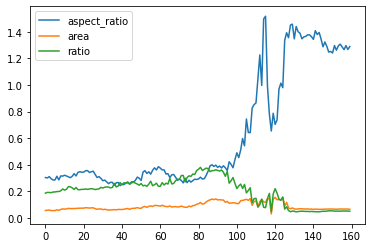

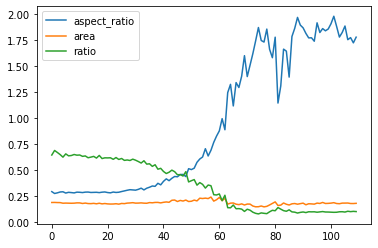

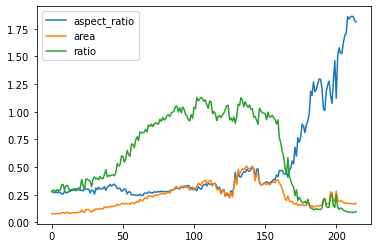

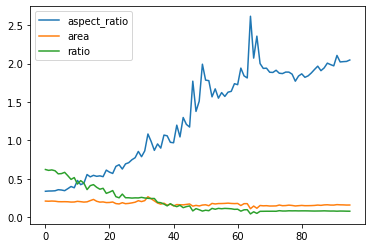

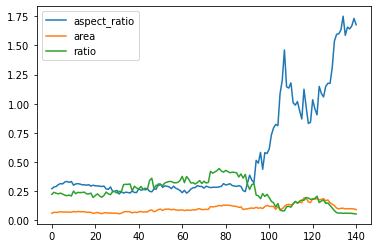

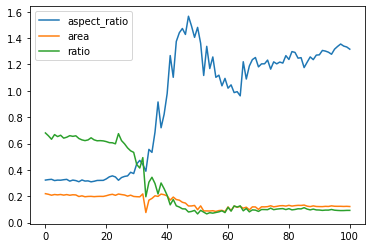

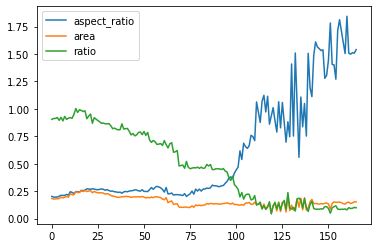

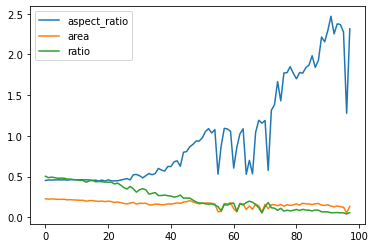

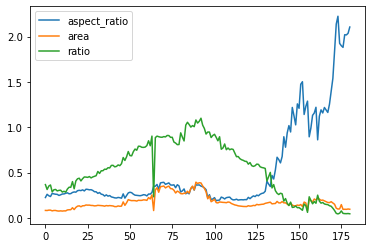

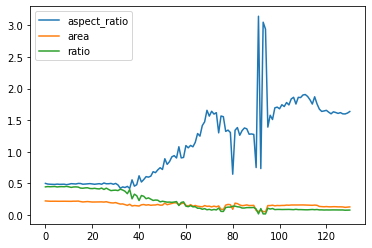

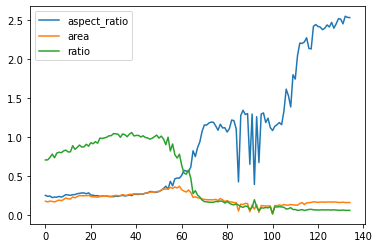

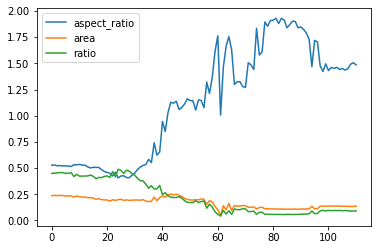

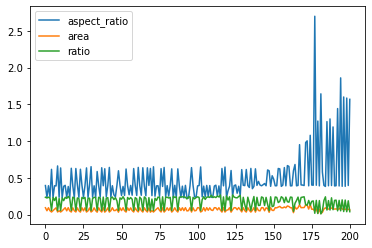

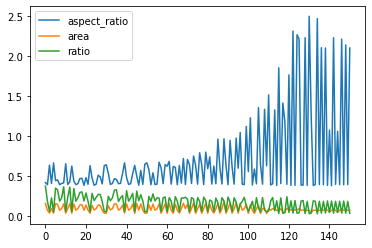

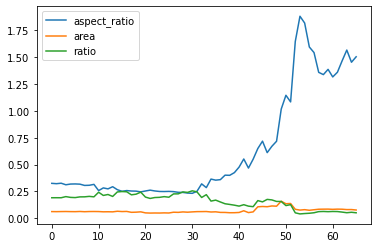

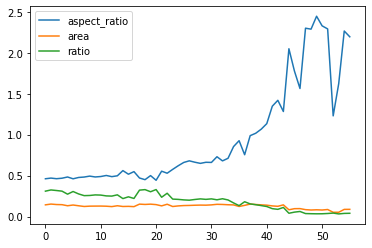

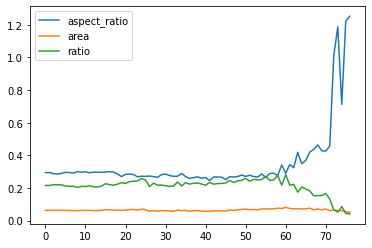

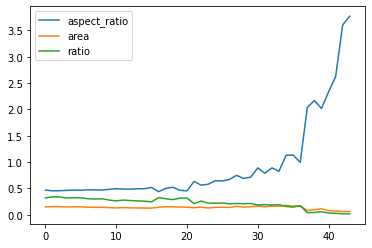

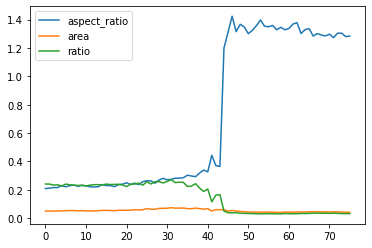

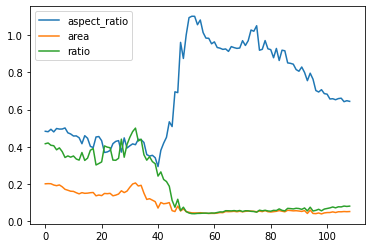

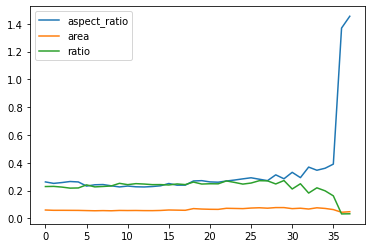

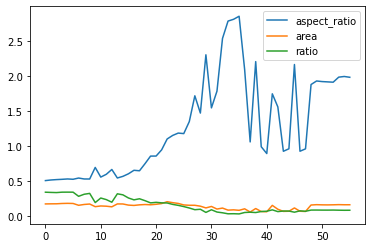

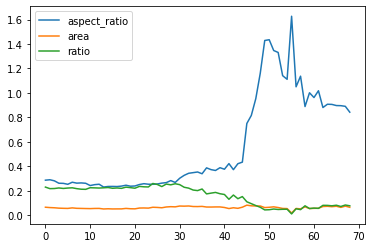

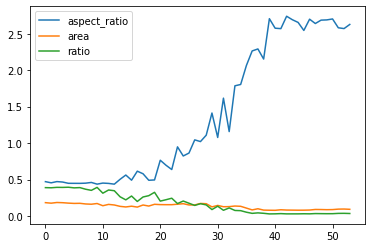

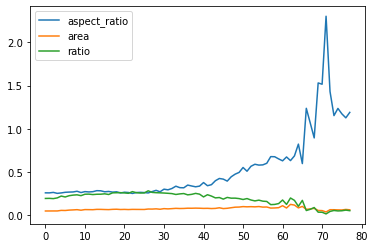

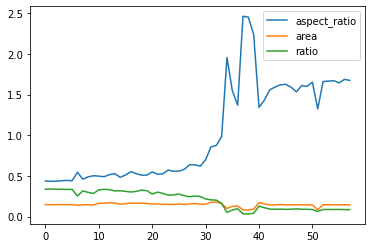

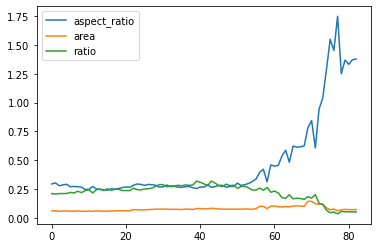

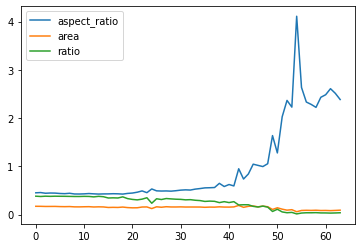

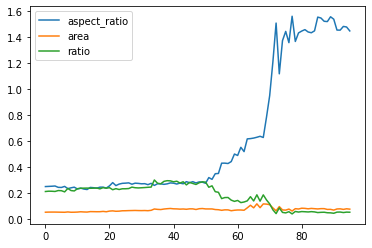

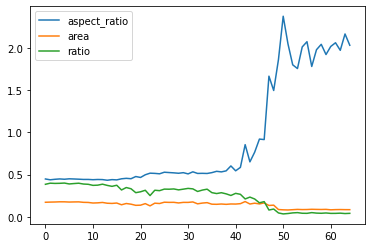

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(len(area)):
  plt.plot(aspect_ratio[i], label='aspect_ratio')
  plt.plot(area[i], label='area')
  plt.plot(ratio[i], label='ratio')
  plt.legend()
  # plt.plot(aspect_ratio[i],area[i])
  plt.show()

  #We can directly approximate fall from graphs, we can say a fall occurred from the point where graph become constant at the end is the point where fall begins 
  #Reference: https://link.springer.com/content/pdf/10.1007%2F978-3-540-77046-6_76.pdf

**Fall Detection using Cummulative ratio:**

In [ ]:
#taking cummulative ratio list for every video
CR=[]
for i in range(len(aspect_ratio)):
  cr=[]
  for j in range(len(ratio[i])):
    if j==0:
      cr.append(ratio[i][j]/ratio[i][0])
    else:
      cr.append(ratio[i][j]/ratio[i][j-1])
  CR.append(cr)

In [ ]:
CR[0]

[1.0,
 1.0295429165093568,
 0.9976189427762571,
 0.9904270197509626,
 1.028043733234617,
 1.0011800382599108,
 1.0154767014919142,
 1.0014349677416827,
 1.0257639198475208,
 1.067593756193935,
 0.9617286570415099,
 1.0296002159343458,
 1.093234220213654,
 0.9933953726344975,
 0.9674328058036616,
 0.945129801693733,
 1.0690072068762997,
 0.9276297636911914,
 1.0026721254054474,
 1.0088510502233263,
 1.0028898914167443,
 1.011576490571076,
 0.9866890641758675,
 1.0140196871936635,
 1.0107626313636626,
 0.9887637288473781,
 0.9802167220293746,
 1.0108220825860146,
 1.0125929764974773,
 1.0528238321594865,
 0.9774525209256726,
 1.0281857935121734,
 1.0079362538725638,
 0.9960117455708485,
 0.9733392279976212,
 1.015699863571064,
 1.1304904114242302,
 0.8967168385440233,
 1.032175933511515,
 1.1082653771889235,
 0.9361358104138192,
 1.0613710516682553,
 0.9909746197606737,
 1.0340181320002424,
 0.9325315634907326,
 1.0447118269403388,
 1.0146424446316644,
 0.9773298028135182,
 0.97319961425

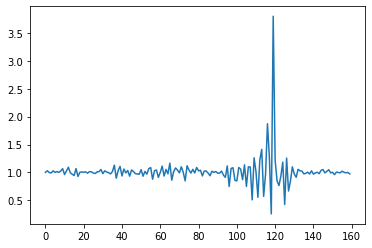

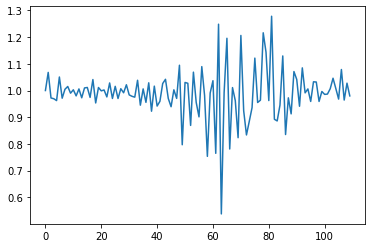

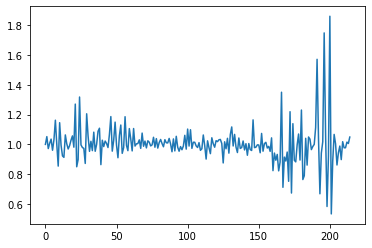

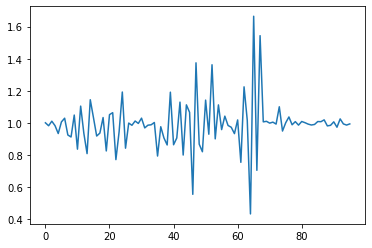

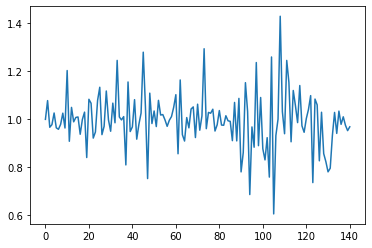

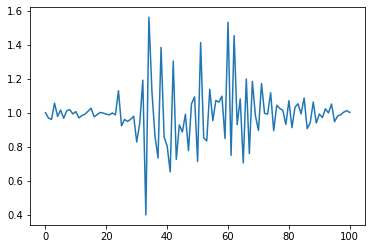

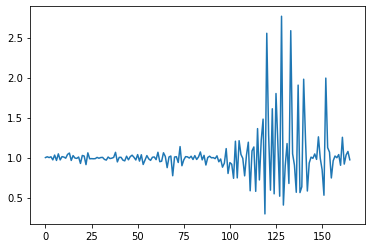

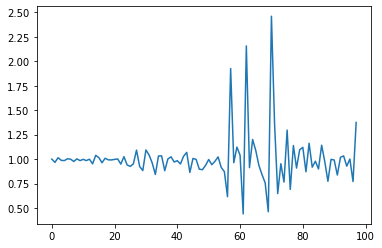

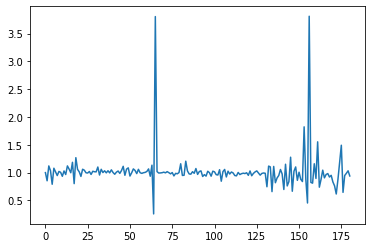

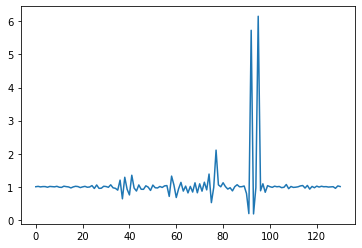

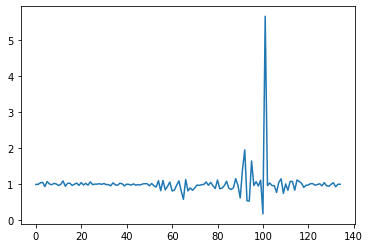

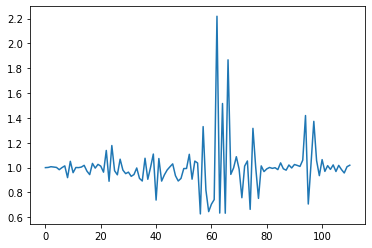

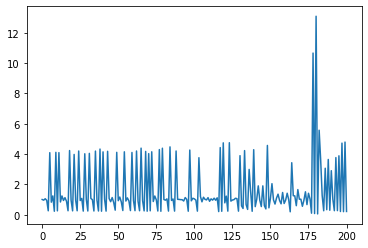

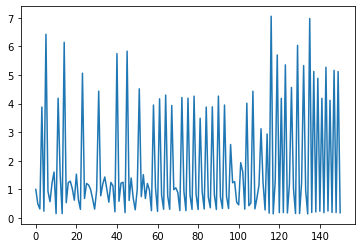

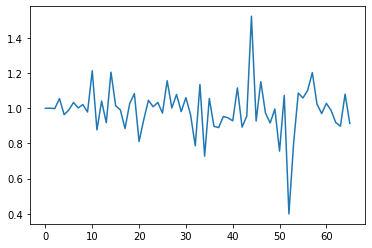

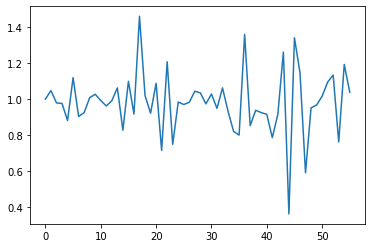

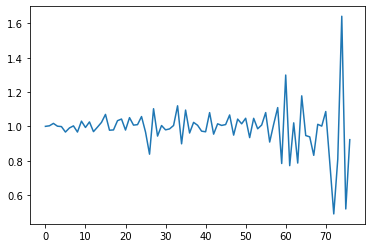

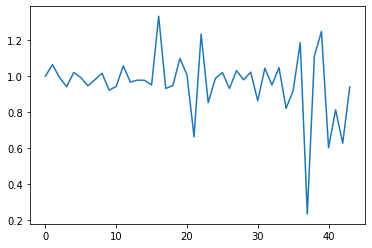

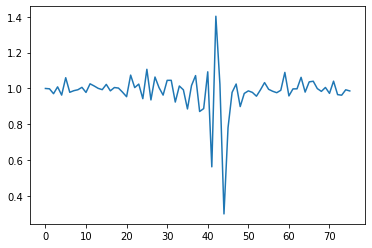

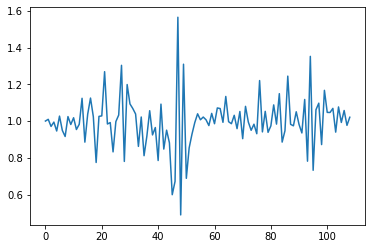

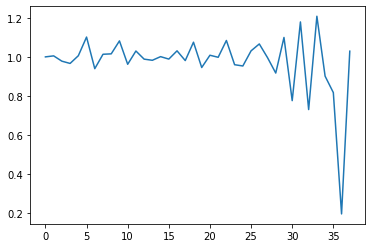

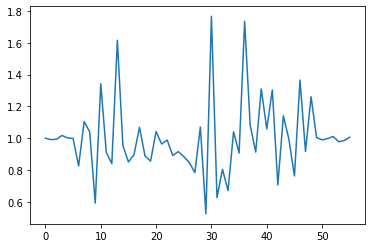

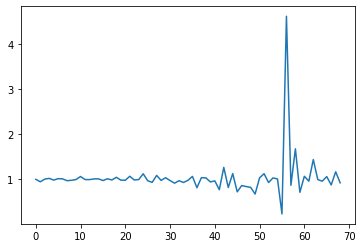

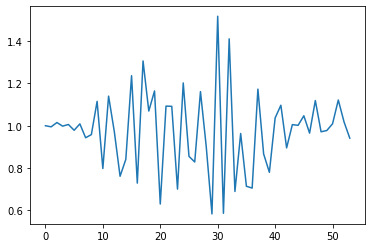

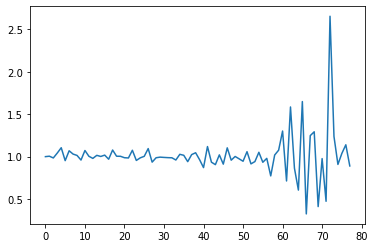

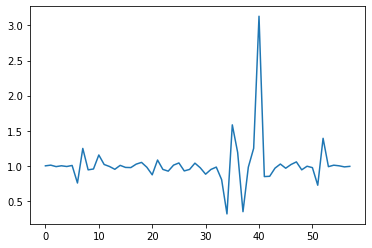

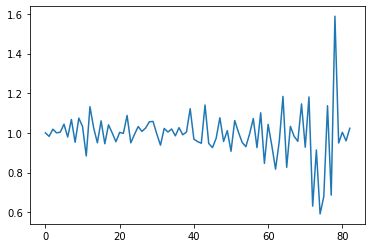

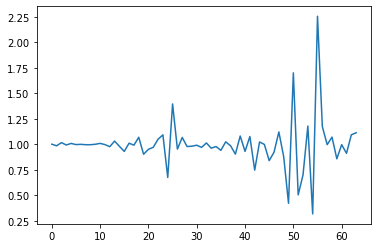

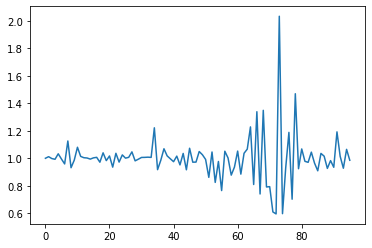

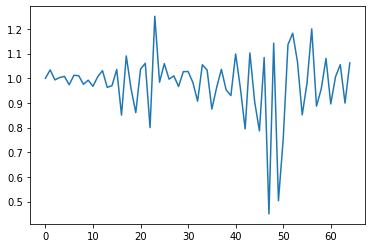

In [ ]:
for i in range(len(CR)):
  plt.plot(CR[i])
  plt.show()

In [ ]:
#Detection of start of fall points
values=[]
start=[]
for i in range(len(CR)):
  values.append(max(CR[i]))
  start.append(CR[i].index(max(CR[i])))
start

[119,
 81,
 200,
 65,
 108,
 34,
 128,
 70,
 156,
 95,
 101,
 62,
 180,
 116,
 44,
 17,
 74,
 16,
 42,
 47,
 33,
 30,
 56,
 30,
 72,
 40,
 78,
 55,
 73,
 23]

In [ ]:
len(start)

30

In [ ]:
Actual_values=[113,70,178,44,109,41,115,60,151,70,79,55,74,46,58,47,89,46,55,48,51,34,57,42,75,43,81,57,79,55]

In [ ]:
len(Actual_values)

30

In [ ]:
#Accuracy
Error=[]
for i in range(len(start)):
 Error.append((start[i]-Actual_values[i])/Actual_values[i]*100)
Accuracy=100-sum(Error)/30
Accuracy
# Error=(start-Actual_values)/Actual_values*100

96.3666673848527

# Predicting the Fall duration


In [ ]:
# Set the binary classification threshold
threshold = 0.5

# Predict the duration of the fall
cap = cv2.VideoCapture('fall_video.mp4')
frame_count = 0
frames = []
while cap.isOpened() and frame_count < 5:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (160, 120))
    frames.append(frame)
    frame_count += 1
cap.release()
if frame_count == 5:
    video_data = np.array([np.array(frames)])
    prediction = model.predict(video_data)
    if prediction > threshold:
        # The fall event occurred
        start_time = 0 # The start time of the fall event
        end_time = 4 # The end time of the fall event
        duration = end_time - start_time # The duration of the fall event
        print('Fall duration:', duration)
    else:
        # The fall event did not occur
        print('No fall event detected.')
